In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

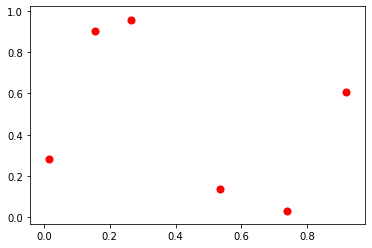

In [2]:
# One example of overfitting
np.random.seed(12) #Seed generator (to enable same results)
x, y = np.random.rand(6),np.random.rand(6)
plt.scatter(x,y, c='red', s=50)

In [3]:
def newplot(n=1):
    t = np.linspace(-0.2, 1.2, 1000)
    plt.scatter(x,y, c='red', s=50)
    plt.plot(t, 0.5*np.sin(n*t) + 0.5)

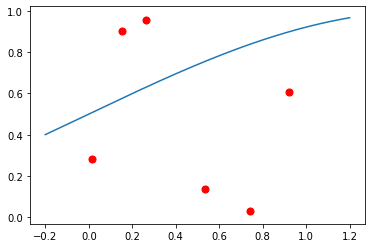

In [4]:
newplot()

In [5]:
from ipywidgets import interact
interact(newplot, n = (1, 200)) #A small overfitting example

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.newplot(n=1)>

# Linear Regression

$$Example: f(x) = 1.2x + 0.8$$

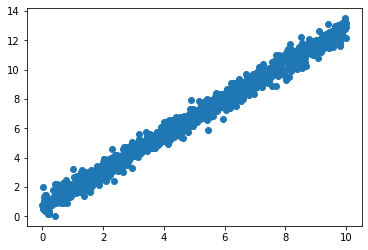

In [6]:
# Making a sample dataset
x = np.linspace(0, 10, 1000)
y = 1.2*x + 0.8 + 0.4*np.random.randn(1000)
plt.scatter(x, y)

In [7]:
# Training and testing data
from sklearn.model_selection import train_test_split

In [8]:
x.shape

(1000,)

## Note:
### The data input of machine learning methods is more favored(?) to shape[[x1], [x2], ...] than [x1, x2, ...]

In [9]:
x = x.reshape(1000, 1)
y = y.reshape(1000, 1)

In [10]:
x.shape

(1000, 1)

In [11]:
x_train, x_test = train_test_split(x, train_size = 800, test_size = 200, random_state = 1)
y_train, y_test = train_test_split(y, train_size = 800, test_size = 200, random_state = 1)

In [12]:
x_train.shape

(800, 1)

In [13]:
#1.做函數學習機
from sklearn.linear_model import LinearRegression

In [14]:
#2.做訓練
model = LinearRegression().fit(x_train, y_train)

In [15]:
#3.預測
model.predict([[10]]) #Needs to match shape (2D)

array([[12.87805016]])

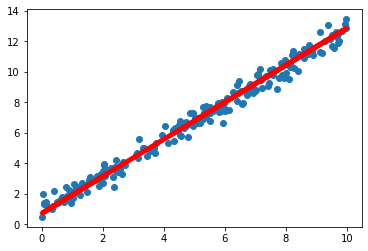

In [16]:
plt.scatter(x_test, y_test)
y_predict = model.predict(x_test)
plt.plot(x_test, y_predict, c = 'red', lw = 5)

In [17]:
model.score(x_test, y_test)
linear_func = f"{model.coef_[0][0]}x + {model.intercept_[0]}"

In [18]:
linear_func

'1.215879710818264x + 0.719253051944766'

## Boston Housing Dataset

In [19]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [20]:
boston_dataset.feature_names, len(boston_dataset.feature_names)

(array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'), 13)

In [21]:
# Make the data into a DataFrame

boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

In [22]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
# Let's use Seaborn!
import seaborn as sns

### Preparing the training data

In [24]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
#我們一樣套用三部曲: 1. 開函數學習機
regr = LinearRegression()

In [27]:
# 2. 訓練
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_predict = model.predict(x_test)

In [29]:
sum((y_predict-y_test)**2) #SSE

3411.795959763008

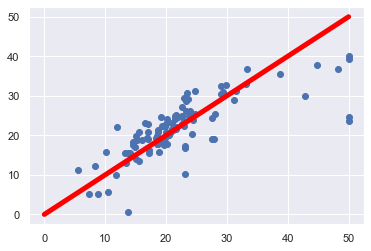

In [30]:
sns.set() #以後畫圖就交給SeaBorn吧!

#用y_test跟y_predict來作圖
plt.scatter(y_test, y_predict)
plt.plot([0,50],[0,50], c = 'red', lw = 5)

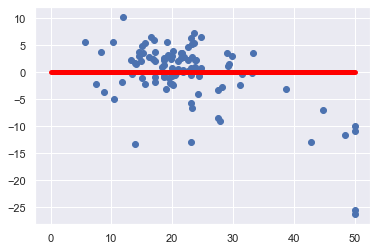

In [31]:
#用y_test跟y_predict-y_test(residual)來作圖
plt.scatter(y_test, y_predict-y_test)
plt.plot([0,50],[0,0], c = 'red', lw = 5)

### [指定作業]
#### 1. 房價資料不要用全部的feature去預測。

In [32]:
corr_matrix = boston.corr().round(2) #四捨五入至第二位

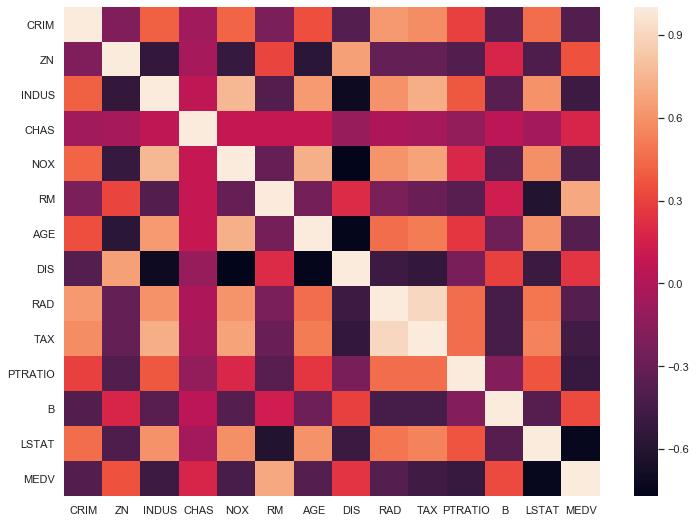

In [33]:
#重要: Matplotlib 3.1.1會把Seaborn的Heatmap搞壞，更新至3.1.2即可解決
sns.set(rc = {"figure.figsize":(12, 9)})
sns.heatmap(corr_matrix)

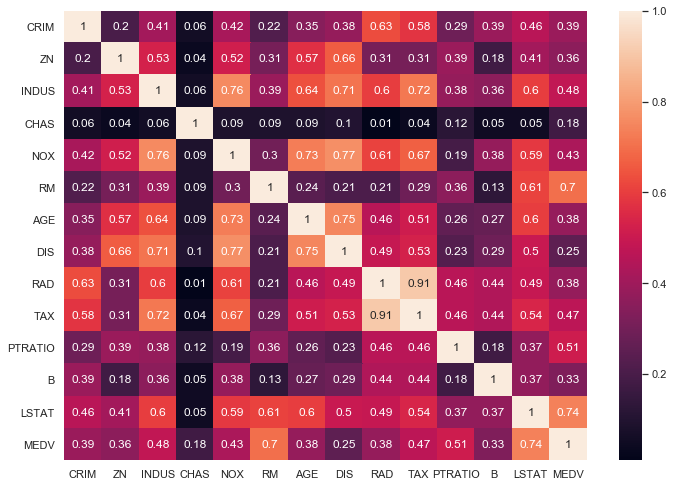

In [34]:
#我們需要挑出相關係數高的，包含正相關跟負相關，所以需要修正一下
corr_matrix2 = abs(boston.corr().round(2))
sns.set(rc = {"figure.figsize":(11.7, 8.27)})
sns.heatmap(corr_matrix2, annot=True)